In [1]:
import pandas as pd 
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

In [2]:
def prepare_data(ticker, beg='2010-01-01', last='2020-01-01'):
    """
    Import data via yfinance, defaulted to begin from '2020-01-01' to the most recent market day
    
    Parameters
    ----------
    ticker : str
        name of ticker (e.g. "AAPL")
    beg : str
        valid date indicating beginning of historical data ('yyyy-mm-dd'), defaulted to '2010-01-01'
    last : str
        valid date indicating ending of historical data ('yyyy-mm-dd'), defaulted to '2020-01-01'
    
    datetime.today().strftime('%Y-%m-%d') for today's date
    
    Returns
    -------
    df : DataFrame
        dataframe of historical daily prices from ticker
    """
    
    #today = datetime.today().strftime('%Y-%m-%d')
    data = yf.Ticker(ticker)
    df = data.history(start=beg, end=last, rounding=True)
    
    print()
    print(f"TICKER: {ticker}")
    print(f"Current price: ${df.iloc[-1]['Close']}")
    print(f"Initial price: ${df.iloc[0]['Close']}")
    print("---------------------------------------------")
    
    return df[['Close']]

In [3]:
ts = prepare_data('AMZN')
ts


TICKER: AMZN
Current price: $92.39
Initial price: $6.7
---------------------------------------------


,Close
Date,
2010-01-04 00:00:00-05:00,6.70
2010-01-05 00:00:00-05:00,6.73
2010-01-06 00:00:00-05:00,6.61
2010-01-07 00:00:00-05:00,6.50
2010-01-08 00:00:00-05:00,6.68
...,...
2019-12-24 00:00:00-05:00,89.46
2019-12-26 00:00:00-05:00,93.44
2019-12-27 00:00:00-05:00,93.49


<AxesSubplot:xlabel='Date'>

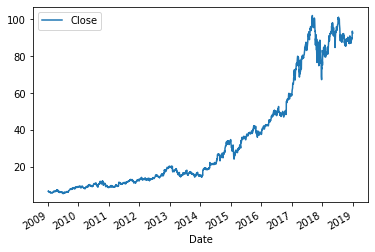

In [4]:
ts.plot()

In [5]:
# preprocess data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ts_sc = scaler.fit_transform(ts)

end = round(len(ts)*0.8)
print(f'{end} days for training, {len(ts)-end} days for validating')

train = ts_sc[:end]
val = ts_sc[end:]

train

2013 days for training, 503 days for validating


array([[0.01315381],
       [0.01346453],
       [0.01222165],
       ...,
       [0.55598136],
       [0.55805282],
       [0.54935267]])

In [6]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)
n_input = 60
n_feats = 1

In [9]:
x_train = []
y_train = []

for i in range(n_input, len(train)):
    x_train.append(train[i-n_input:i, 0])
    y_train.append(train[i, 0])
    if i == n_input: # first iteration
        print(f'first iteration - (x,y) len: {len(x_train), len(y_train)}')
        print(x_train)
        print(y_train)
        print()
    
    elif i == n_input+1: # second iteration, two sequences
        print(f'second iteration - (x,y) len: {len(x_train), len(y_train)}')
        print(x_train)
        print(y_train)
        

first iteration - (x,y) len: (1, 1)
[array([0.01315381, 0.01346453, 0.01222165, 0.01108234, 0.01294666,
       0.01128949, 0.00973589, 0.01066805, 0.00973589, 0.00963231,
       0.00983946, 0.0089073 , 0.0093216 , 0.00662869, 0.00611082,
       0.00559296, 0.0073537 , 0.00901088, 0.00870016, 0.00528224,
       0.00497152, 0.00538581, 0.00383221, 0.00455722, 0.0042465 ,
       0.00486794, 0.00455722, 0.00590368, 0.00569653, 0.0046608 ,
       0.00403936, 0.00486794, 0.0046608 , 0.00486794, 0.00445365,
       0.0058001 , 0.00497152, 0.00507509, 0.00828586, 0.00880373,
       0.0089073 , 0.01035733, 0.01056447, 0.01118591, 0.0104609 ,
       0.01139306, 0.01294666, 0.0120145 , 0.01170378, 0.0120145 ,
       0.01180735, 0.01253237, 0.01128949, 0.01128949, 0.01066805,
       0.01004661, 0.0135681 , 0.01367167, 0.01377525, 0.01450026])]
[0.014085965820818232]

second iteration - (x,y) len: (2, 2)
[array([0.01315381, 0.01346453, 0.01222165, 0.01108234, 0.01294666,
       0.01128949, 0.0097358

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1) 
# added extra dimension, x_train.shape = (len(x_train), n_input)

print(x_train.shape, y_train.shape)

(1953, 60, 1) (1953,)


In [11]:
val

array([[0.55950285],
       [0.56737442],
       [0.5701709 ],
       [0.58032108],
       [0.58943553],
       [0.59243915],
       [0.59337131],
       [0.60486794],
       [0.61967892],
       [0.61947178],
       [0.61439669],
       [0.6135681 ],
       [0.61418954],
       [0.63117556],
       [0.64940445],
       [0.64681512],
       [0.6573796 ],
       [0.66980839],
       [0.67788711],
       [0.68834801],
       [0.69508027],
       [0.66359399],
       [0.68430865],
       [0.66359399],
       [0.69093734],
       [0.67747281],
       [0.64319006],
       [0.63749353],
       [0.6616261 ],
       [0.67633351],
       [0.69518384],
       [0.7007768 ],
       [0.69394096],
       [0.70419472],
       [0.71175557],
       [0.71299845],
       [0.7205593 ],
       [0.73195236],
       [0.72677369],
       [0.72698084],
       [0.71714138],
       [0.72066287],
       [0.73278094],
       [0.74003107],
       [0.74386328],
       [0.74738477],
       [0.76136717],
       [0.771

In [37]:
# create val dataset

x_val = []
y_val = val[n_input:]
for i in range(n_input, len(val)): # 1953 - end
    x_val.append(val[i-n_input:i, 0])

In [38]:
x_val, y_val = np.array(x_val), np.array(y_val)
print(f'Before reshape: {x_val.shape, y_val.shape}')

x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
y_val = y_val.reshape(-1) 
print(f'After reshape: {x_val.shape, y_val.shape}')

Before reshape: ((443, 60), (443, 1))
After reshape: ((443, 60, 1), (443,))


In [14]:
def LSTM(unit):
    """Creates LSTM architecture"""
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(unit, input_shape = (n_input, n_feats), return_sequences=True)) # (60, 1) we have 1953 of them
    model.add(tf.keras.layers.LSTM(unit, return_sequences=False))
        
    model.add(tf.keras.layers.Dense(16))
    model.add(tf.keras.layers.Dense(1))
    print("created LSTM")
    
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=['MSE'])
    print("compiled LSTM")
    print()
    
    return model

LSTM = LSTM(32)
LSTM.summary()

created LSTM
compiled LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 13,217
Trainable params: 13,217
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = LSTM.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
123/123 [==============================] - 7s 35ms/step - loss: 0.0011 - MSE: 0.0011
Epoch 2/10
123/123 [==============================] - 5s 39ms/step - loss: 1.1290e-04 - MSE: 1.1290e-04
Epoch 3/10
123/123 [==============================] - 5s 43ms/step - loss: 1.0068e-04 - MSE: 1.0068e-04
Epoch 4/10
123/123 [==============================] - 4s 36ms/step - loss: 9.0744e-05 - MSE: 9.0744e-05
Epoch 5/10
123/123 [==============================] - 5s 37ms/step - loss: 9.4345e-05 - MSE: 9.4345e-05
Epoch 6/10
123/123 [==============================] - 5s 38ms/step - loss: 8.5817e-05 - MSE: 8.5817e-05
Epoch 7/10
123/123 [==============================] - 6s 45ms/step - loss: 7.5337e-05 - MSE: 7.5337e-05
Epoch 8/10
123/123 [==============================] - 7s 53ms/step - loss: 7.4951e-05 - MSE: 7.4951e-05
Epoch 9/10
123/123 [==============================] - 4s 36ms/step - loss: 7.2211e-05 - MSE: 7.2211e-05
Epoch 10/10
123/123 [==============================] - 5s 39ms/step - lo

In [17]:
preds = LSTM.predict(x_val)
preds = scaler.inverse_transform(preds)
preds

array([[ 77.49818 ],
       [ 76.495674],
       [ 75.11977 ],
       [ 73.83077 ],
       [ 72.79628 ],
       [ 72.22486 ],
       [ 71.66692 ],
       [ 71.21794 ],
       [ 71.05632 ],
       [ 71.00347 ],
       [ 71.16014 ],
       [ 71.31041 ],
       [ 71.527756],
       [ 72.12663 ],
       [ 72.98646 ],
       [ 74.07548 ],
       [ 75.00836 ],
       [ 75.73915 ],
       [ 75.960205],
       [ 75.91526 ],
       [ 76.05525 ],
       [ 76.5536  ],
       [ 77.12636 ],
       [ 77.78666 ],
       [ 78.35041 ],
       [ 78.83028 ],
       [ 79.266365],
       [ 79.73813 ],
       [ 80.12224 ],
       [ 80.51426 ],
       [ 80.864044],
       [ 81.11797 ],
       [ 81.28677 ],
       [ 81.240944],
       [ 81.15688 ],
       [ 81.01268 ],
       [ 80.80336 ],
       [ 80.64138 ],
       [ 80.48459 ],
       [ 80.463615],
       [ 80.50979 ],
       [ 80.62997 ],
       [ 80.79052 ],
       [ 81.02716 ],
       [ 81.30382 ],
       [ 81.644   ],
       [ 82.11626 ],
       [ 82.7

In [18]:
preds = preds.reshape(-1)
preds.shape

(443,)

In [44]:
val60 = scaler.inverse_transform(val[:60])
p = np.append(val60, preds)
p

array([ 59.45      ,  60.21      ,  60.48      ,  61.46      ,
        62.34      ,  62.63      ,  62.72      ,  63.83      ,
        65.26      ,  65.24      ,  64.75      ,  64.67      ,
        64.73      ,  66.37      ,  68.13      ,  67.88      ,
        68.9       ,  70.1       ,  70.88      ,  71.89      ,
        72.54      ,  69.5       ,  71.5       ,  69.5       ,
        72.14      ,  70.84      ,  67.53      ,  66.98      ,
        69.31      ,  70.73      ,  72.55      ,  73.09      ,
        72.43      ,  73.42      ,  74.15      ,  74.27      ,
        75.        ,  76.1       ,  75.6       ,  75.62      ,
        74.67      ,  75.01      ,  76.18      ,  76.88      ,
        77.25      ,  77.59      ,  78.94      ,  79.92      ,
        79.41      ,  79.55      ,  79.12      ,  78.58      ,
        77.25      ,  79.33      ,  79.09      ,  77.25      ,
        74.78      ,  77.79      ,  74.85      ,  71.57      ,
        77.49817657,  76.49567413,  75.11976624,  73.83

In [64]:
l = ts.iloc[end:, :]
t = pd.Series(p, index=l.index)
t

Date
2018-01-02 00:00:00-05:00    59.450000
2018-01-03 00:00:00-05:00    60.210000
2018-01-04 00:00:00-05:00    60.480000
2018-01-05 00:00:00-05:00    61.460000
2018-01-08 00:00:00-05:00    62.340000
                               ...    
2019-12-24 00:00:00-05:00    89.734085
2019-12-26 00:00:00-05:00    89.923813
2019-12-27 00:00:00-05:00    90.523499
2019-12-30 00:00:00-05:00    91.236870
2019-12-31 00:00:00-05:00    91.821648
Length: 503, dtype: float64

In [65]:
ts['Preds'] = None
ts.iloc[end:, 1:] = t

In [66]:
ts

,Close,Preds
Date,,
2010-01-04 00:00:00-05:00,6.70,None
2010-01-05 00:00:00-05:00,6.73,None
2010-01-06 00:00:00-05:00,6.61,None
2010-01-07 00:00:00-05:00,6.50,None
2010-01-08 00:00:00-05:00,6.68,None
...,...,...
2019-12-24 00:00:00-05:00,89.46,89.7341
2019-12-26 00:00:00-05:00,93.44,89.9238
2019-12-27 00:00:00-05:00,93.49,90.5235


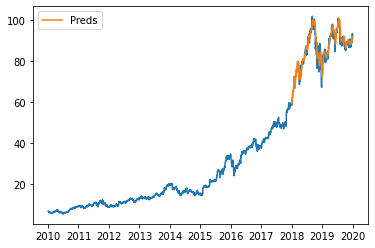

In [67]:
plt.figure()
plt.plot(ts['Close'])
plt.plot(ts['Preds'],label='Preds')
plt.legend()

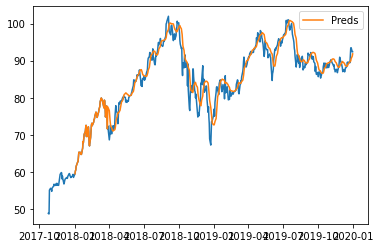

In [69]:
plt.figure()
plt.plot(ts['Close'][-550:])
plt.plot(ts['Preds'],label='Preds')
plt.legend()